<a href="https://colab.research.google.com/github/pnistha11/Data-Analysis-Projects/blob/main/Laptop_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Price Analysis
Objectives of the Project
The primary objectives of this project are:

*   To analyze factors influencing laptop prices
*   To perform data cleaning and preprocessing

*  To explore relationships between hardware features and price
*  To engineer meaningful features for better prediction


*   To build and compare regression models
*   To evaluate model performance using statistical metrics






In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Collection

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/owm4096/laptop-prices")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nisthapatel11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/owm4096/laptop-prices


100%|██████████| 25.2k/25.2k [00:00<00:00, 59.8MB/s]

In [ ]:
#load dataset
data = pd.read_csv("/content/laptop-prices/laptop_prices.csv")

In [ ]:
data.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

# Data Preprocessing

In [ ]:
# Check for missing values
data.isnull().sum()
# Fill missing values if any (for simplicity, you can drop missing values)
data = data.dropna()

In [ ]:
#Fix categorical Yes/No
binary_cols = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [ ]:
#Remove outliers (Price)
q1 = data['Price_euros'].quantile(0.25)
q3 = data['Price_euros'].quantile(0.75)
iqr = q3 - q1

data = data[(data['Price_euros'] >= q1 - 1.5*iqr) &
        (data['Price_euros'] <= q3 + 1.5*iqr)]

# Feature Engineering

In [ ]:
#Price per GB RAM
data = data.copy()
data['Price_per_RAM'] = data['Price_euros'] / data['Ram']

In [ ]:
#Total Storage
data = data.copy()
data['TotalStorage'] = data['PrimaryStorage'] + data['SecondaryStorage']

In [ ]:
#Screen Area
data = data.copy()
data['ScreenArea'] = data['ScreenW'] * data['ScreenH']

# EDA

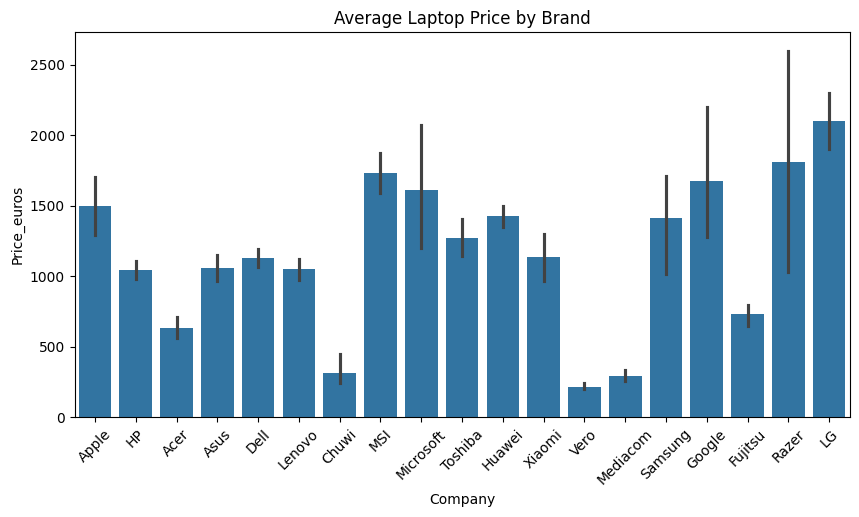

In [ ]:
#Price by Brand
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Company', y='Price_euros', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Laptop Price by Brand")
plt.show()

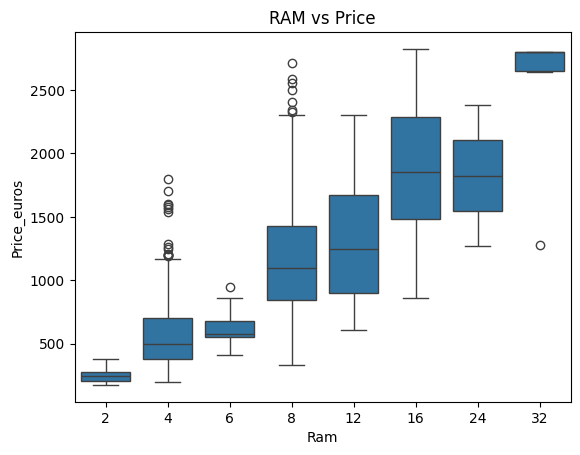

In [ ]:
#RAM vs Price
sns.boxplot(data=data, x='Ram', y='Price_euros')
plt.title("RAM vs Price")
plt.show()

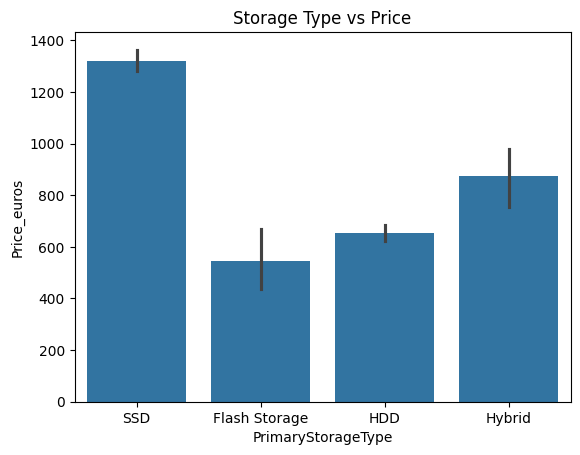

In [ ]:
#Storage Type Impact
sns.barplot(data=data, x='PrimaryStorageType', y='Price_euros')
plt.title("Storage Type vs Price")
plt.show()

# Machine Learning Pipeline

In [ ]:
#Features & Target
X = data.drop('Price_euros', axis=1)
y = data['Price_euros']

#Separate Columns
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

#Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Model Training

***Model 1 : Linear Regression***

In [ ]:
lr_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage', 'Price_per_RAM', 'TotalStorage', 'ScreenArea'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'CPU_company',
       'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company', 'GPU_model'],
      dtype='object'))])),
                ('model', LinearRegression())])

***Model 2 : Random Forest***

In [ ]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_freq', 'PrimaryStorage',
       'SecondaryStorage', 'Price_per_RAM', 'TotalStorage', 'ScreenArea'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'CPU_company',
       'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company', 'GPU_model'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

# Model Evaluation

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Train
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

#Evaluate on TEST
def evaluate(model):
    preds = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }
results = {
    "Linear Regression": evaluate(lr_model),
    "Random Forest": evaluate(rf_model)
}
results = pd.DataFrame(results).T
results.columns = ["MAE", "RMSE", "R2"]
print(results)

                          MAE        RMSE        R2
Linear Regression  157.601338  230.745138  0.854101
Random Forest       18.984376   84.475802  0.980445


In [ ]:
data.to_csv("cleaned_laptop_data.csv", index=False)